In [42]:
# ============ importar librerias a usar ============
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix

## 1.FUNCIONES DE ACTIVACION

In [ ]:
def escalon(x):
  if x > 0:
    return 1
  else:
    return 0

In [ ]:
def sigmoide(x):
  # para que salga exactamente 0 o exactamente 1
  if x<=-10:
    return 0
  elif x >= 10:
    return 1
  else:
    return 1/(1+np.exp(-x))

In [ ]:
escalon_vec = np.vectorize(escalon)
sigmoide_vec = np.vectorize(sigmoide)

# 2.RNA PERCEPTRON

In [ ]:
# creando la neurona
def neurona(entradaX, pesosW1, biasB1, funcion="escalon"):
  # capa 1
  entrada_neta = np.dot(pesosW1,entradaX) + biasB1 # Z = W*X + b
  if funcion == "escalon":
    salida_C1 = escalon_vec(entrada_neta)  # f(Z)
  else:
    salida_C1 = sigmoide_vec(entrada_neta)
  return salida_C1[0] #salida

In [ ]:
def ajuste_perceptron(entradas, salidas, coef_aprendizaje, pesos, bias):
  for entrada, salida_deseada in zip(entradas,salidas):
    salida_obtenida = neurona(entrada, pesos, bias)
    error =  salida_deseada - salida_obtenida
    if error != 0: # ajustando pesos
      pesos += coef_aprendizaje*error*entrada
      bias += coef_aprendizaje*error*(1) # se pone -1 si el bias de la neurona es -bias para positivizarlos
  return pesos, bias # retorna  pesos y bias parciales


In [ ]:
# perceptron fit
def entrenar_perceptron(entradas, salidas, coef_aprendizaje, epocas):
  n=len(entradas[0])
  pesos = np.array(2*np.random.rand(1,n)-1) # 9 entradas 1 neurona
  bias = 2*np.random.rand(1)-1
  for iter in range(epocas): # buscar pesos, bias
    pesos, bias = ajuste_perceptron(entradas, salidas, coef_aprendizaje, pesos, bias)
  return pesos, bias #retorna pesos y bias optimo


# 3.LECTURA DE DATOS

In [ ]:
df = pd.read_csv("voz.csv")
df.head()

frecuencia_media        sd   mediana        Q1        Q3       IQR  \
0          0.059781  0.064241  0.032027  0.015071  0.090193  0.075122   
1          0.066009  0.067310  0.040229  0.019414  0.092666  0.073252   
2          0.077316  0.083829  0.036718  0.008701  0.131908  0.123207   
3          0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   
4          0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   

        skew         kurt    sp.ent       sfm  ...  centroide   meanfun  \
0  12.863462   274.402905  0.893369  0.491918  ...   0.059781  0.084279   
1  22.423285   634.613855  0.892193  0.513724  ...   0.066009  0.107937   
2  30.757155  1024.927705  0.846389  0.478905  ...   0.077316  0.098706   
3   1.232831     4.177296  0.963322  0.727232  ...   0.151228  0.088965   
4   1.101174     4.333713  0.971955  0.783568  ...   0.135120  0.106398   

     minfun    maxfun   meandom    mindom    maxdom   dfrange   modindx  \
0  0.015702  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000   
1  0.015826  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632   
2  0.015656  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512   
3  0.017798  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119   
4  0.016931  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274   

   genero  
0    male  
1    male  
2    male  
3    male  
4    male  

[5 rows x 21 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   frecuencia_media  3168 non-null   float64
 1   sd                3168 non-null   float64
 2   mediana           3168 non-null   float64
 3   Q1                3168 non-null   float64
 4   Q3                3168 non-null   float64
 5   IQR               3168 non-null   float64
 6   skew              3168 non-null   float64
 7   kurt              3168 non-null   float64
 8   sp.ent            3168 non-null   float64
 9   sfm               3168 non-null   float64
 10  moda              3168 non-null   float64
 11  centroide         3168 non-null   float64
 12  meanfun           3168 non-null   float64
 13  minfun            3168 non-null   float64
 14  maxfun            3168 non-null   float64
 15  meandom           3168 non-null   float64
 16  mindom            3168 non-null   float64


In [ ]:
df.describe()

edad       peso      altura     muneca     biceps       sexo
count  36.000000  36.000000   36.000000  36.000000  36.000000  36.000000
mean   31.444444  68.952778  171.555556  10.466667  31.166667   0.500000
std    10.554469  14.868999   10.520170   1.175463   5.234392   0.507093
min    19.000000  42.000000  147.200000   8.300000  23.500000   0.000000
25%    24.750000  54.950000  164.800000   9.475000  25.975000   0.000000
50%    28.000000  71.500000  172.700000  10.650000  32.150000   0.500000
75%    37.000000  82.400000  179.400000  11.500000  35.050000   1.000000
max    65.000000  98.200000  190.500000  12.400000  40.400000   1.000000

# 4.ANALISIS EXPLORATORIO DE DATOS

In [ ]:
df["genero"].unique()

array(['male', 'female'], dtype=object)

In [ ]:
# convirtiendo a 1 y 0
df["genero"].replace({'female': 0, 'male': 1}, inplace=True)

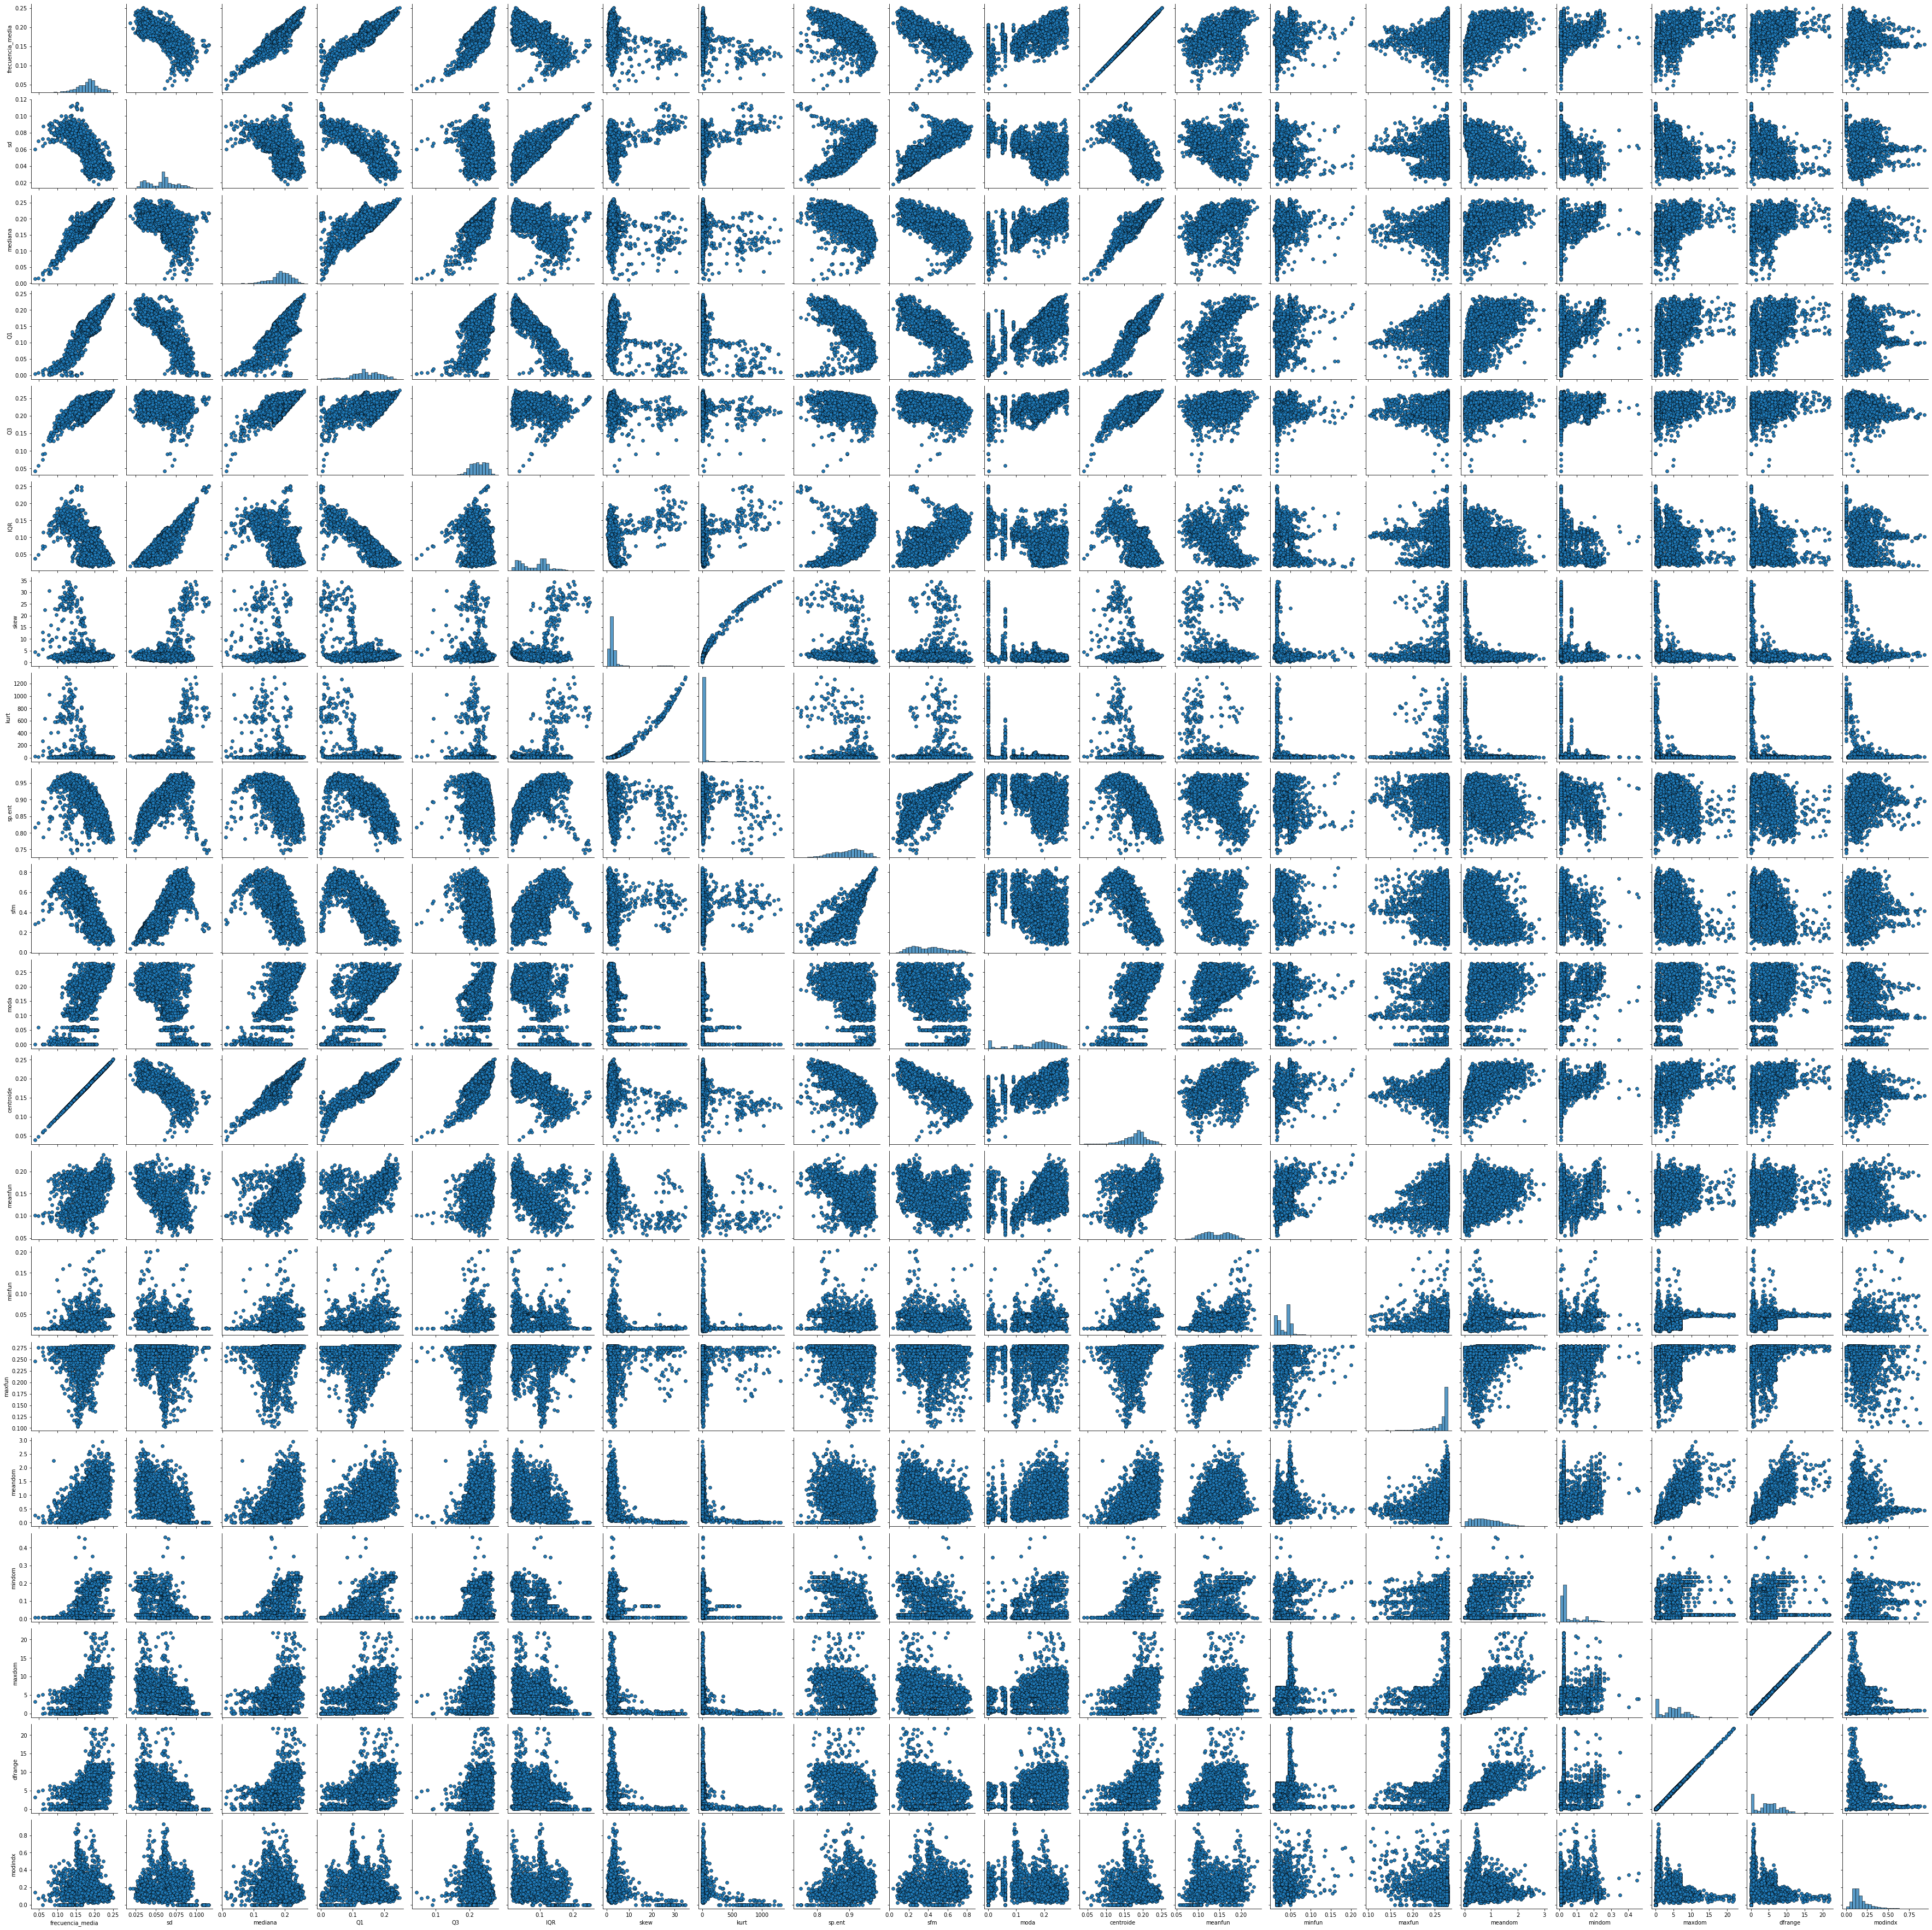

In [ ]:
#matriz de scatterplots(gráficos de dispersión)
sns.pairplot(data=df[df.columns[0:20]], diag_kws={'edgecolor':'k', 'bins':25}, plot_kws={'edgecolor':'k'})
plt.show()

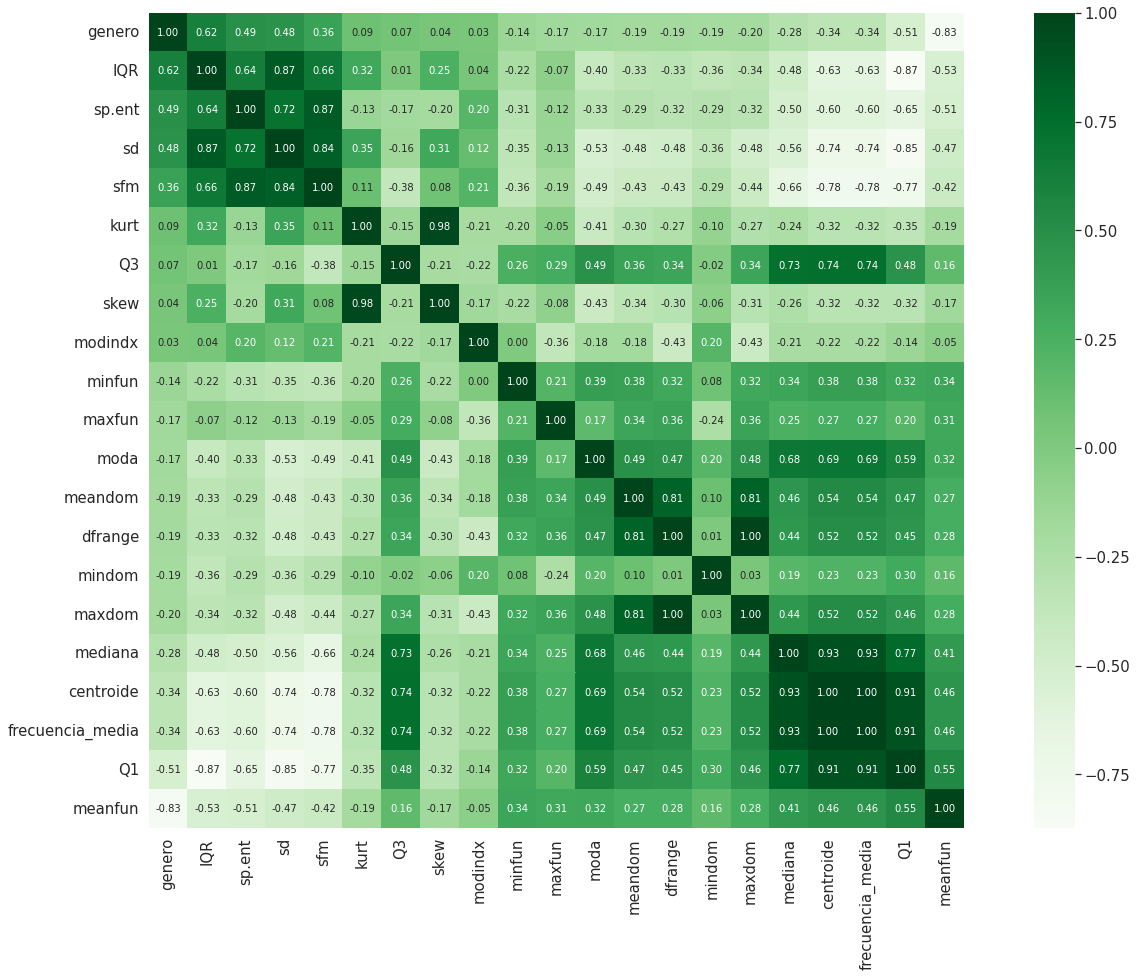

In [45]:
corr = df.corr()
plt.figure(figsize=(25, 15))
columnas = corr.nlargest(21 , 'genero')['genero'].index
cm = np.corrcoef(df[columnas].values.T)
sns.set(font_scale=1.35)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=columnas.values, xticklabels=columnas.values,cmap="Greens")
plt.show()

# 5.NORMALIZACION DE DATOS

In [ ]:
X = df.drop("genero", axis=1)
Y = df["genero"]

scaler = preprocessing.StandardScaler()
scaler.fit(X)
# =========== TRANSFORMANDO =========== 
X = scaler.transform(X)

# 6.SEPARACION DE DATOS

In [ ]:
# =========== SEPARACION DE DATOS =========== 
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
print("Tamaño del conjunto de entrenamiento", X_train.shape)
print("Tamaño del conjunto de prueba", X_test.shape)

Tamaño del conjunto de entrenamiento (2217, 20)
Tamaño del conjunto de prueba (951, 20)


# 7.ENTRENAMIENTO

In [ ]:
# modulo FIT
def fit_perceptron(entradas,salidas,coef_aprendizaje,epocas):
  pesos, bias = entrenar_perceptron(entradas, salidas, coef_aprendizaje, epocas)
  return pesos, bias

In [ ]:
# FIT
pesos,bias = fit_perceptron(X_train,y_train, 0.2, 100)
print(pesos,bias)

[[ 0.48416307  1.93312876 -1.68920553 -1.03877137  0.21331315  0.89138887
   0.13215811 -1.20356033  3.14019504 -3.03145576  0.54529586 -0.35280706
  -7.68075595  1.32832926 -0.17506756  0.97159516 -1.05352519  0.26082609
  -0.08005375  0.22001746]] [-1.19512209]


# 8.TEST RNA

In [ ]:
def perceptron_predict(entradas):
  y_pred = []
  for entrada in entradas:
    y_pred.append(neurona(entrada,pesos,bias))
  return y_pred

In [ ]:
y_pred=perceptron_predict(X_test)

In [ ]:
pd.DataFrame(confusion_matrix(y_test, y_pred), columns=["Predict-YES", "Predict-NO"], index=["YES","NO"])

Predict-YES  Predict-NO
YES          427          25
NO            10         489

# 9.METRICAS

In [ ]:
print(classification_report(y_test,y_pred ))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       452
           1       0.95      0.98      0.97       499

    accuracy                           0.96       951
   macro avg       0.96      0.96      0.96       951
weighted avg       0.96      0.96      0.96       951



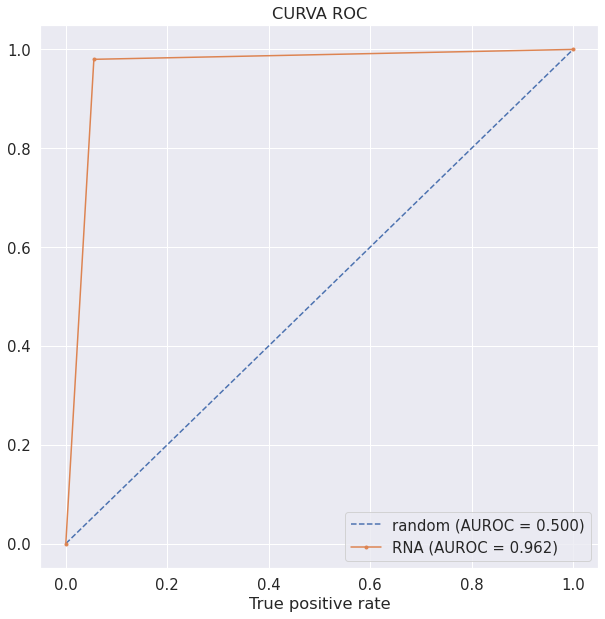

In [ ]:
# Curva de ROC
from sklearn.metrics import roc_curve, roc_auc_score
models_probabilities=[]
models_probabilities.append(y_pred)

models_probs = []
models_fpr_tpr = []
for y_pred in models_probabilities:
  # Calculando auc score
  auc = roc_auc_score(y_test, y_pred)
  models_probs.append(auc)
  # Calculando la curva de ROC -> fpr,tpr
  model_fpr, model_tpr, _ = roc_curve(y_test, y_pred)
  models_fpr_tpr.append((model_fpr, model_tpr))

r_probs = [0 for _ in range(len(y_test))] # probabilidad de referencia base
models_probs.append(roc_auc_score(y_test, r_probs))
model_fpr_, model_tpr_, _ = roc_curve(y_test, r_probs)
models_fpr_tpr.append((model_fpr_, model_tpr_))

# graficando CURVA ROC

auc_RNA = models_probs[0]
auc_r = models_probs[1]

RNA_fpr, RNA_tpr = models_fpr_tpr[0]
r_fpr, r_tpr = models_fpr_tpr[1]

plt.figure(figsize=(10,10))

plt.plot(r_fpr, r_tpr,linestyle='--', label="random (AUROC = %0.3f)" % auc_r)
plt.plot(RNA_fpr, RNA_tpr,marker='.', label="RNA (AUROC = %0.3f)" % auc_RNA)

plt.title("CURVA ROC")
plt.xlabel("False positive rate")
plt.xlabel("True positive rate")

plt.legend()
plt.show()

# 10.SALVAR Y RECUPERAR VALORES(peso, bias) DEL MODELO DE RNA ENTRENADO

In [ ]:
file_values = open("voz.txt","w")
for peso in pesos[0]:
  file_values.writelines(f"{peso}\n")
#file_values.writelines(f"{pesos[0]}")
file_values.write(f"{bias[0]}")
file_values.close()

In [ ]:
# RECUPERAR VALORES DEL MODELO DE RNA

with open("voz.txt") as file_object:
  contents = file_object.readlines()
  
# extraer los datos en una lista  
values_saved = []
for value in contents:
  values_saved.append(float(value.rstrip('\n')))

In [ ]:
weight_saved = np.array([values_saved[0:-1]])
bias_saved = values_saved[-1]

# 11.PREDICCION

In [ ]:
def predecir(entrada,pesos,bias):
  return neurona(entrada,pesos,bias)

In [ ]:
df.columns

Index(['frecuencia_media', 'sd', 'mediana', 'Q1', 'Q3', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'moda', 'centroide', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'genero'],
      dtype='object')

In [ ]:
def leer_datos():
  features = ['frecuencia_media', 'sd', 'mediana', 'Q1', 'Q3', 'IQR', 'skew', 'kurt',
              'sp.ent', 'sfm', 'moda', 'centroide', 'meanfun', 'minfun', 'maxfun',
              'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']
  data_input = []
  for feature in features:
    value = float(input(f"insert value of {feature}: "))
    data_input.append(value)
  return data_input

In [ ]:
entrada = leer_datos()

insert value of frecuencia_media: 0.067089
insert value of sd: 0.066310
insert value of mediana: 0.041229
insert value of Q1: 0.018414
insert value of Q3: 0.0927
insert value of IQR: 0.070252323
insert value of skew: 4.503440541
insert value of kurt: 4.17729621
insert value of sp.ent: 0.863322462
insert value of sfm: 0.773568058
insert value of moda: 0.112555426
insert value of centroide: 0.122786407
insert value of meanfun: 0.12013192
insert value of minfun: 0.017113299
insert value of maxfun: 0.2439683254
insert value of meandom: 0.298221983
insert value of mindom: 0.9609375
insert value of maxdom: 4.6953125
insert value of dfrange: 2.15625
insert value of modindx: 0.148272018


In [ ]:
entrada_df = np.array([entrada]) # convertir a array de numpy y lista de listas
# NORMALIZANDO LOS DATOS DE ENTRADA
entrada_df = scaler.transform(entrada_df)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
result = predecir(entrada_df[0],weight_saved,bias_saved)
if result == 1:
  print("varon")
else:
  print("mujer")

mujer
